<a href="https://colab.research.google.com/github/Induwara24/Rose-Hearts/blob/main/Rose_Hearts_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# get data from google drive
!gdown --id 1YxLmo9Nw5bLOGErfNkoWqUlEyWf2Rsq8

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1YxLmo9Nw5bLOGErfNkoWqUlEyWf2Rsq8
From (redirected): https://drive.google.com/uc?id=1YxLmo9Nw5bLOGErfNkoWqUlEyWf2Rsq8&confirm=t&uuid=b4e59a38-b105-42ea-9f39-5bddb51104bf
To: /content/Mammogram_Dataset_KAU.zip
100% 606M/606M [00:10<00:00, 59.3MB/s]


In [2]:
# unzip the folder
!unzip /content/Mammogram_Dataset_KAU.zip

Archive:  /content/Mammogram_Dataset_KAU.zip
   creating: Mammogram_Dataset_KAU/
   creating: Mammogram_Dataset_KAU/Benign/
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC003026_ CC_L.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC003026_ CC_R.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC003026_ MLO_L.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC003026_ MLO_R.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC009941_ CC_L.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC009941_ CC_R.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC009941_ MLO_L.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC009941_ MLO_R.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC010562_ CC_L.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC010562_ CC_R.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC010562_ MLO_L.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC010562_ MLO_R.jpg  
  inflating: Mammogram_Dataset_KAU/Benign/2013_BC01118

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import shutil
import glob

In [4]:
# count the number of mammograms in the respective classes
ROOT_DIR = "/content/Mammogram_Dataset_KAU"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Malignant', 124), ('Normal', 1865), ('Benign', 387)])

##Spliting the data;
- 70% for train data
- 15% for test data
- 15% for validation data

In [5]:
# create a function to split the data into separate folders
def splitDataFolder(path, split):

  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./"+path+"/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size=math.floor(split*number_of_images[dir]), replace=False):
      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join("./"+path, dir)
      shutil.copy(O, D)
      os.remove(O)

  else:
    print(f"{path} folder already exists.")

In [6]:
# create the train folder
splitDataFolder("train", 0.7)

train folder already exists.


In [7]:
# create the validation folder
splitDataFolder("val", 0.15)

val folder already exists.


In [8]:
# create the test folder
splitDataFolder("test", 0.15)

test folder already exists.


# Model build

In [9]:
# import libraries
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
import keras

## CNN Model

In [10]:
# build the CNN model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=3, activation="softmax"))   # Multi-class classification: Normal, Benign, Malignant

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,635,491 (21.50 MB)

 Trainable params: 5,635,491 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# complile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Preparing the data using Data Generator

In [12]:
# create function to preprocess images
def preprocessingImages1(path):
  """
  input: path to the folder
  output: preprocessed images
  """
  # data augmentation
  image_data = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )
  image = image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode="categorical"
  )
  return image

In [13]:
# preprocess train data
path = "/content/train"
train_data = preprocessingImages1(path)

Found 1661 images belonging to 3 classes.


In [14]:
# create function to preprocess images
def preprocessingImages2(path):
  """
  input: path to the folder
  output: preprocessed images
  """
  image_data = ImageDataGenerator(
      rescale=1./255
  )
  image = image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode="categorical"
  )
  return image

In [15]:
# preprocess test data
path = "/content/test"
test_data = preprocessingImages2(path)

Found 355 images belonging to 3 classes.


In [16]:
# preprocess validation data
path = "/content/val"
val_data = preprocessingImages2(path)

Found 355 images belonging to 3 classes.


In [17]:
# early stopping and model checkpoint
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')
mc = ModelCheckpoint(filepath="./best_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode='auto')

cb = [es, mc]

### Model training

In [18]:
hs = model.fit(
    train_data, # Changed 'generator' to directly use train_data
    steps_per_epoch=8,
    epochs=30,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cb
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - accuracy: 0.5885 - loss: 0.7666
Epoch 1: val_accuracy improved from -inf to 0.83099, saving model to ./best_model.h5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.6043 - loss: 0.7511 - val_accuracy: 0.8310 - val_loss: 0.3583
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8682 - loss: 0.3439
Epoch 2: val_accuracy improved from 0.83099 to 0.85352, saving model to ./best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8633 - loss: 0.3499 - val_accuracy: 0.8535 - val_loss: 0.3374
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8539 - loss: 0.3863
Epoch 3: val_accuracy improved from 0.85352 to 0.87042, saving model to ./best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.8522 - loss: 0.3884 - val_accuracy: 0.8704 - val_loss: 0.3476
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8731 - loss: 0.2685
Epoch 4: val_accuracy did not improve from 0.87042
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8742 - loss: 0.2662 - val_accuracy: 0.8676 - val_loss: 0.3769
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8170 - loss: 0.4363
Epoch 5: val_accuracy did not improve from 0.87042
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8178 - loss: 0.4370 - val_accuracy: 0.8704 - val_loss: 0.3286
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8231 - loss: 0.3973
Epoch 6: val_accuracy did not improve from 0.87042
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8263 - loss: 0.3965 - val_accuracy: 0.8704 - val_loss: 0.3346
Epoch 7/30
4/8 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7734 - loss: 0.5437
Epoch 7: val_accuracy did not improve from 0.87042
8/8 ━━━━━━━━

- We got the best val_accuracy as 0.8704 in Epoch 3.
- We can ensure the model is not overfitting because the difference between accuracy and val_accuracy is not exceeding 10% in every Epoch.

### Model graphical interpretation

In [19]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

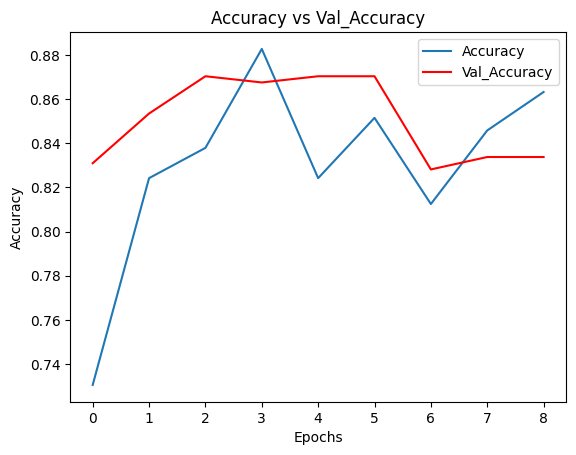

In [20]:
# graph of accuracy vs val_accuracy
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"], c = "red")
plt.title("Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Val_Accuracy"])
plt.show()

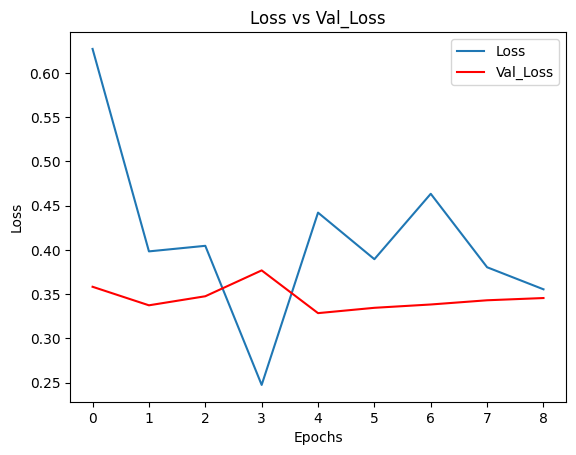

In [21]:
# graph of loss vs val_loss
plt.plot(h["loss"])
plt.plot(h["val_loss"], c = "red")
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Val_Loss"])
plt.show()

### Model accuracy


In [22]:
# load the best model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [23]:
# Model accuracy
accuracy = model.evaluate(test_data)[1]
print(f"Test Accuracy: {round(accuracy*100, 2)}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 801ms/step - accuracy: 0.8149 - loss: 0.4291
Test Accuracy: 82.54%


### Test the model with mammogram images

In [28]:
train_data.class_indices

{'Benign': 0, 'Malignant': 1, 'Normal': 2}

In [24]:
from keras.preprocessing.image import load_img, img_to_array

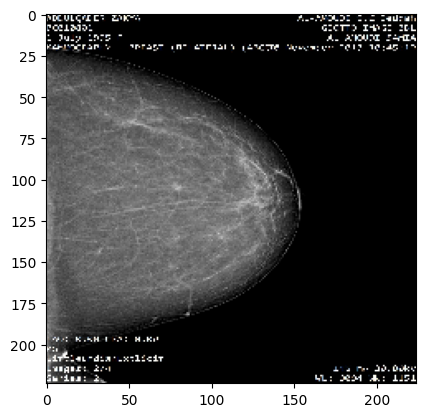

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Normal


In [35]:
path = "/content/Mammogram_Dataset_KAU/Normal/2013_BC010801_ CC_L.jpg"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)
# Get the prediction probabilities using 'predict'
pred_probs = model.predict(input_arr)
# Get the class with the highest probability using argmax
pred = np.argmax(pred_probs, axis=1)
pred

if pred == 0:
  print("Prediction: Benign")
elif pred == 1:
  print("Prediction: Malignant")
else:
  print("Prediction: Normal")